In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
file = "Resources/modern_RAPTOR_by_player.csv"
df = pd.read_csv(file)

In [3]:
df.columns

Index(['player_name', 'player_id', 'season', 'poss', 'mp',
       'raptor_box_offense', 'raptor_box_defense', 'raptor_box_total',
       'raptor_onoff_offense', 'raptor_onoff_defense', 'raptor_onoff_total',
       'raptor_offense', 'raptor_defense', 'raptor_total', 'war_total',
       'war_reg_season', 'war_playoffs', 'predator_offense',
       'predator_defense', 'predator_total', 'pace_impact'],
      dtype='object')

In [4]:
df = df.loc[(df["season"] == 2019)]
df = df.loc[(df["poss"] >= 3000)]
df = df[['player_name', 'player_id', 'season', 'poss', 'mp',
       'raptor_box_offense', 'raptor_onoff_offense',
       'raptor_offense',
       'war_reg_season',  'predator_offense',
     'pace_impact']]
df

,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_onoff_offense,raptor_offense,war_reg_season,predator_offense,pace_impact
17,Steven Adams,adamsst01,2019,6164,2828,-0.996033,3.709341,-0.071750,6.428883,-0.447207,0.497952
19,Bam Adebayo,adebaba01,2019,3965,1913,-1.952989,-1.147330,-1.875310,3.451224,-2.152283,-0.420702
44,LaMarcus Aldridge,aldrila01,2019,5983,2931,0.642954,0.792040,0.648586,6.412487,0.608198,-1.233311
49,Jarrett Allen,allenja01,2019,4723,2206,-2.093528,1.321625,-1.506668,-1.688439,-1.606712,0.145826
67,Al-Farouq Aminu,aminual01,2019,5656,2691,-0.498527,3.607683,0.299846,4.838686,0.238300,-0.591089
...,...,...,...,...,...,...,...,...,...,...,...
2921,Marvin Williams,willima02,2019,4432,2133,-1.575452,0.713966,-1.204919,0.791987,-0.917166,-0.523381
2939,Justise Winslow,winslju01,2019,4065,1959,-0.791421,1.230624,-0.379682,2.664563,-0.056048,0.094036
2960,Delon Wright,wrighde01,2019,3586,1699,0.974905,-1.667885,0.482276,4.504779,-0.119078,-0.800096
2987,Thaddeus Young,youngth01,2019,5347,2619,0.231886,2.181659,0.666183,6.364636,0.599050,-0.873491


In [5]:
name_list = []
for name in df["player_name"]:
    name = name.split(" ")
    name_list.append(name[1])


In [7]:
df["last_name"] = name_list
df

,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_onoff_offense,raptor_offense,war_reg_season,predator_offense,pace_impact,last_name
17,Steven Adams,adamsst01,2019,6164,2828,-0.996033,3.709341,-0.071750,6.428883,-0.447207,0.497952,Adams
19,Bam Adebayo,adebaba01,2019,3965,1913,-1.952989,-1.147330,-1.875310,3.451224,-2.152283,-0.420702,Adebayo
44,LaMarcus Aldridge,aldrila01,2019,5983,2931,0.642954,0.792040,0.648586,6.412487,0.608198,-1.233311,Aldridge
49,Jarrett Allen,allenja01,2019,4723,2206,-2.093528,1.321625,-1.506668,-1.688439,-1.606712,0.145826,Allen
67,Al-Farouq Aminu,aminual01,2019,5656,2691,-0.498527,3.607683,0.299846,4.838686,0.238300,-0.591089,Aminu
...,...,...,...,...,...,...,...,...,...,...,...,...
2921,Marvin Williams,willima02,2019,4432,2133,-1.575452,0.713966,-1.204919,0.791987,-0.917166,-0.523381,Williams
2939,Justise Winslow,winslju01,2019,4065,1959,-0.791421,1.230624,-0.379682,2.664563,-0.056048,0.094036,Winslow
2960,Delon Wright,wrighde01,2019,3586,1699,0.974905,-1.667885,0.482276,4.504779,-0.119078,-0.800096,Wright
2987,Thaddeus Young,youngth01,2019,5347,2619,0.231886,2.181659,0.666183,6.364636,0.599050,-0.873491,Young


In [8]:
def graphs(x,y):

    x = df[x]
    y = df[y]
    labels = df["last_name"]

    ax = plt.figure(figsize=(25,25))
    plt.scatter(x, y)
    plt.title("Offense v War")
    plt.xlabel("Offense")
    plt.ylabel("Predetor Offense")
    for x,y,z in zip(x,y,labels):

        plt.annotate(z, # this is the text
                (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(4,4), # distance from text to points (x,y)
                 ha='right') 

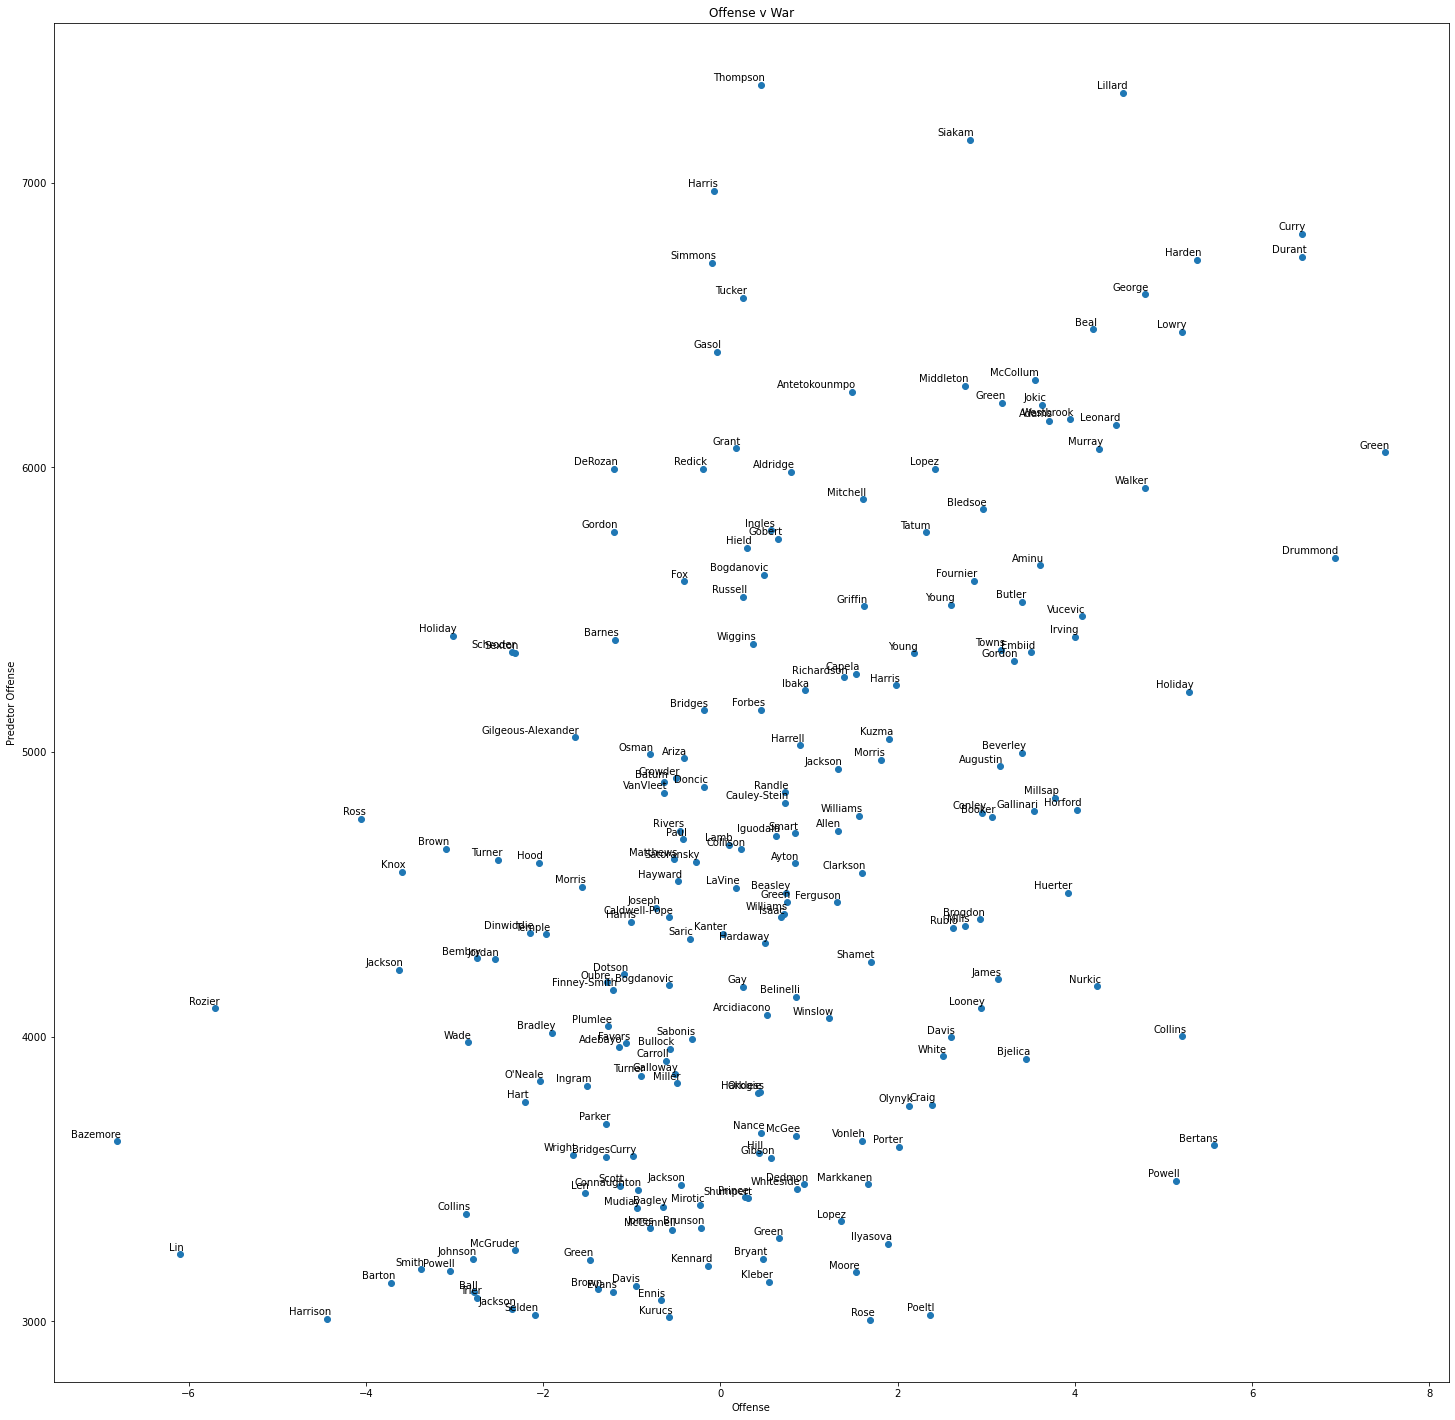

In [9]:
graphs("raptor_onoff_offense", "poss")